In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from census import Census
import gmaps


# # Census API Key
from config import api_key
c = Census(api_key, year=2013)

In [2]:
# Read in the Zillow Single family data
single_family_df = pd.read_csv('Resources/SingleFamily_US.csv')
single_family_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,102001,0,United States,Country,NaN,107509.0,107541.0,107597.0,107733.0,107887.0,...,246264,247157,248174,249345,250597,251788,253017,254490,256369,258552
1,394913,1,"New York, NY",Msa,NY,190242.0,189798.0,189517.0,188973.0,188640.0,...,475994,476831,477932,479203,480703,482357,484339,487076,490631,495329
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,190543.0,190841.0,190875.0,191020.0,191023.0,...,697864,701500,706956,712485,716996,718724,720013,724610,732217,740366
3,394463,3,"Chicago, IL",Msa,IL,167002.0,166692.0,166282.0,165813.0,165186.0,...,248769,249027,249405,250016,250560,251157,251896,253169,254873,257160
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,115301.0,115374.0,115539.0,115865.0,116215.0,...,261903,262368,263061,264089,265245,266371,267684,269203,270938,272699


In [3]:
# 5-Year Pricing increase 

five_year_housing_increase = single_family_df[['RegionID', 'SizeRank', 'RegionName','StateName', '9/30/2016','9/30/2020']]
five_year_housing_increase.head(8)

,RegionID,SizeRank,RegionName,StateName,9/30/2016,9/30/2020
0,102001,0,United States,NaN,207139.0,258552
1,394913,1,"New York, NY",NY,422238.0,495329
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",CA,609739.0,740366
3,394463,3,"Chicago, IL",IL,223424.0,257160
4,394514,4,"Dallas-Fort Worth, TX",TX,213975.0,272699
5,394974,5,"Philadelphia, PA",PA,223557.0,268118
6,394692,6,"Houston, TX",TX,200806.0,232207
7,395209,7,"Washington, DC",DC,402366.0,469854


In [4]:
# calculate 5-year price increase %

five_year_percent_inc = five_year_housing_increase['9/30/2020']/five_year_housing_increase['9/30/2016']-1
five_year_percent_inc

0      0.248205
1      0.173104
2      0.214234
3      0.150995
4      0.274443
         ...   
909    0.280807
910   -0.007553
911    0.517566
912    0.112384
913    0.090460
Length: 914, dtype: float64

In [5]:
# append % inc to the dataset
five_year_housing_increase['% of Inc'] = five_year_percent_inc
five_year_housing_increase

C:\Users\liuzh_000\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RegionID,SizeRank,RegionName,StateName,9/30/2016,9/30/2020,% of Inc
0,102001,0,United States,NaN,207139.0,258552,0.248205
1,394913,1,"New York, NY",NY,422238.0,495329,0.173104
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",CA,609739.0,740366,0.214234
3,394463,3,"Chicago, IL",IL,223424.0,257160,0.150995
4,394514,4,"Dallas-Fort Worth, TX",TX,213975.0,272699,0.274443
...,...,...,...,...,...,...,...
909,394767,929,"Lamesa, TX",TX,60287.0,77216,0.280807
910,753874,930,"Craig, CO",CO,190920.0,189478,-0.007553
911,394968,931,"Pecos, TX",TX,86132.0,130711,0.517566
912,395188,932,"Vernon, TX",TX,62304.0,69306,0.112384


In [6]:
# group by State
grouped_state = five_year_housing_increase.groupby('StateName').mean()
grouped_state

,RegionID,SizeRank,9/30/2016,9/30/2020,% of Inc
StateName,,,,,
AK,394595.000000,565.750000,308459.500000,332180.500000,0.074364
AL,411830.333333,374.619048,112818.809524,135227.476190,0.190491
AR,412656.200000,571.250000,91220.900000,106684.900000,0.165465
AZ,394988.727273,325.272727,191720.181818,248400.000000,0.295034
CA,426591.235294,222.500000,396921.454545,480126.794118,0.230878
CO,479177.117647,494.764706,348916.352941,427329.941176,0.233738
CT,394815.600000,110.600000,284310.400000,317361.600000,0.126812
DC,395209.000000,7.000000,402366.000000,469854.000000,0.167728
DE,394795.000000,192.500000,218475.000000,256360.500000,0.174148


In [7]:
# sort dataset 
grouped_state.sort_values(by='% of Inc',ascending=False)

,RegionID,SizeRank,9/30/2016,9/30/2020,% of Inc
StateName,,,,,
ID,449995.384615,538.923077,210784.461538,298052.923077,0.420560
WA,412806.800000,382.000000,243734.150000,338689.150000,0.398741
NV,434609.888889,546.666667,236536.333333,316904.666667,0.339091
UT,430814.100000,479.100000,292877.200000,388375.200000,0.323354
AZ,394988.727273,325.272727,191720.181818,248400.000000,0.295034
ME,394624.250000,263.000000,171304.750000,221704.500000,0.294432
OR,448572.650000,503.150000,246387.736842,308954.300000,0.282425
TN,408578.461538,458.384615,122634.384615,157236.076923,0.274863
FL,419623.551724,269.793103,193960.965517,238672.206897,0.261734


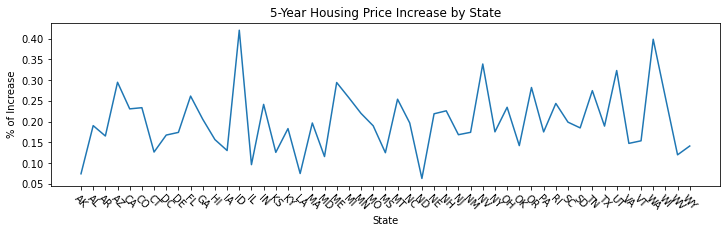

In [8]:
# Trend line graph
grouped_state.sort_values('% of Inc',ascending=False)
plt.figure(figsize=(12,3))
plt.plot(grouped_state.index.values,grouped_state['% of Inc'])
plt.xticks(rotation=-45)
plt.title("5-Year Housing Price Increase by State")
plt.xlabel("State")
plt.ylabel("% of Increase")
plt.show()

In [9]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,B23025_005E,state
0,Alabama,43253.0,4799277.0,38.1,23680.0,870631.0,241930.0,01
1,Alaska,70760.0,720316.0,33.6,32651.0,69514.0,32939.0,02
2,Arizona,49774.0,6479703.0,36.3,25358.0,1131901.0,316360.0,04
3,Arkansas,40768.0,2933369.0,37.5,22170.0,547328.0,121235.0,05
4,California,61094.0,37659181.0,35.4,29527.0,5885417.0,2168665.0,06


In [10]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,01,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,02,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,04,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,05,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,06,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data_states.csv", encoding="utf-8", index=False)

In [12]:
# Read in the csv containing state centroid coordinates
centroids = pd.read_csv("Resources/state_centroids.csv")
centroids.head()

,State,Latitude,Longitude
0,Alabama,32.7794,-86.8287
1,Alaska,64.0685,-152.2782
2,Arizona,34.2744,-111.6602
3,Arkansas,34.8938,-92.4426
4,California,37.1841,-119.4696


In [13]:
# Merge the datasets using the sate columns
census_data = pd.merge(census_pd, centroids, how="left", left_on="Name", right_on="State")

# Save the updated dataframe as a csv
census_data.to_csv("Resources/state_census_data.csv", encoding="utf-8", index=False)
census_data

,State_x,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,State_y,Latitude,Longitude
0,01,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968,Alabama,32.7794,-86.8287
1,02,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854,Alaska,64.0685,-152.2782
2,04,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323,Arizona,34.2744,-111.6602
3,05,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961,Arkansas,34.8938,-92.4426
4,06,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662,California,37.1841,-119.4696
5,08,Colorado,5119329.0,36.1,58433.0,31109.0,660874.0,12.909387,4.526785,Colorado,38.9972,-105.5478
6,09,Connecticut,3583561.0,40.2,69461.0,37892.0,354348.0,9.888153,5.321774,Connecticut,41.6219,-72.7273
7,10,Delaware,908446.0,38.9,59878.0,29819.0,103633.0,11.407723,4.535988,Delaware,38.9896,-75.5050
8,11,District of Columbia,619371.0,33.8,65830.0,45290.0,109200.0,17.630790,6.295742,District of Columbia,38.9101,-77.0147
9,12,Florida,19091156.0,41.0,46956.0,26236.0,3052807.0,15.990687,5.741025,Florida,28.6305,-82.4497


In [14]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

Name = census_data['Name']
for Name in us_state_abbrev:
    census_data.append(census_data['Name'])
    
census_data.head()
    



,State_x,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,State_y,Latitude,Longitude
0,01,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968,Alabama,32.7794,-86.8287
1,02,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854,Alaska,64.0685,-152.2782
2,04,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323,Arizona,34.2744,-111.6602
3,05,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961,Arkansas,34.8938,-92.4426
4,06,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662,California,37.1841,-119.4696


In [15]:
# Rename State Name
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

# Simple test examples
if __name__ == '__main__':
    print("Wisconin --> WI?", us_state_abbrev['Wisconsin'] == 'WI')
    print("WI --> Wisconin?", abbrev_us_state['WI'] == 'Wisconsin')
    print("Number of entries (50 states, DC, 5 Territories) == 56? ", 56 == len(us_state_abbrev))

Wisconin --> WI? True
WI --> Wisconin? True
Number of entries (50 states, DC, 5 Territories) == 56?  True
